# Preparativos

Primero cargamos los datos y los guardamos en una variable secundaria, cosa que no tengamos que volverlos a cargar

In [11]:
import pandas as pd
import numpy as np
import datetime
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_excel('tenderers_2018.xlsx')

In [4]:
#Checkpoint
Tender_df = df

In [5]:
df2 = pd.read_excel('awards_2018.xlsx')

In [6]:
Award_df = df2

# Preguntas

1.- ¿Existe una correlación entre el monto adjudicado y el tipo de procedimiento de contratación utilizado?

2.- ¿Qué factores influyen en la duración de los procesos de adjudicación de licitaciones?

3.- ¿Es posible predecir qué tipo de empresa (por tamaño) gana más contratos en ciertos sectores?

4.- ¿Qué categorías de licitaciones muestran similitudes en cuanto a montos y tiempos de adjudicación?

5.- ¿Cómo se distribuyen geográficamente las contrataciones públicas según el tipo de proveedor?

### Segunda pregunta

Para responder a esta pregunta haremos un grafico de correlación entre las siguientes columnas y sus respectivas justificaciones acerca de porque las usamos:

- tender_enquiryPeriod_durationInDays: Debido a que esta es la columna que muestra la duración de la licitación en días.
- estimated_cost: El costo es muy importante, ya que se relaciona con la cantidad y para que se utilizó.
- quantity: La cantidad del producto.
- Nombre Segmento: Esta es una columna que representa de manera mas general la licitación. (El para que se utilizó).
- tender_hasEnquiries: Esta columna contiene booleanos, cuales representan si es que hubieron consultas o no durante la licitacion (de esta manera aumentando su duración).
- buyer_legalName: La entidad detras de la licitación.

In [12]:
df_cor = Award_df[["tender_enquiryPeriod_durationInDays", "estimated_cost", "quantity", "Nombre Segmento", "tender_hasEnquiries"]]
label_encoder = LabelEncoder()
df_cor["Nombre Segmento"] = label_encoder.fit_transform(df_cor["Nombre Segmento"])
df_cor["tender_hasEnquiries"] = label_encoder.fit_transform(df_cor["tender_hasEnquiries"])

C:\Users\ReToxi\AppData\Local\Temp\ipykernel_732\646447686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor["Nombre Segmento"] = label_encoder.fit_transform(df_cor["Nombre Segmento"])
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_732\646447686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor["tender_hasEnquiries"] = label_encoder.fit_transform(df_cor["tender_hasEnquiries"])


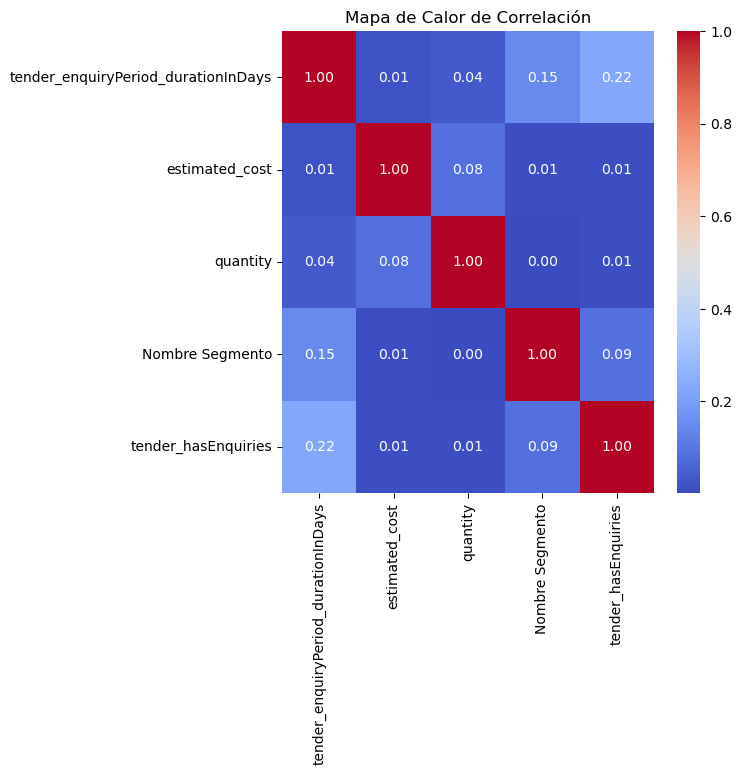

In [14]:
#2

correlacion = df_cor.corr()

# Crear un mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()